## Задачи классификации и логистическая регрессия

В машинном обучении задачей классификации называется ситуация, когда в качестве $y$ (переменной которую мы хотим предсказать) выступает категориальная переменная. Это означает, что данная переменная задает разбиение нашего датасета на классы, которых может быть как 2, так и больше. Нашей задачей в таком случае становится построение алгоритма, который бы смог отделить классы друг от друга в пространстве признаков, или что тоже самое провести разделяющую поверхность между классами.

Прежде чем что-то обучать, нам необходимо выбрать функцию потерь для нашей задачи. Одним из решений является логистическая функция потерь, которая имееть следующий вид:

$$
L(y, z) = -\sum_i y_i \log(z_i) + (1 - y_i) \log(1 - z_i)
$$

где $z_i$ - это вероятность принадлежности к классу 1 предсказанная нашим алгоритмом. *Помедетируйте над лоссом! Подумайте почему правильно предсказанная вероятность минимизирует его!*

Чтобы заставить ваш алгоритм возвращать значения из отрезка $[0, 1]$, вы можете обернуть его выход в сигмоиду. Сигмоида это любая S - образная функция принимающая значения из отрезка $[0, 1]$. Частный случай: логистическая функция, имеет следующий вид:

$$
\sigma (x) = \frac{1}{1 + e^{-x}}
$$

Посмотрим как она выглядит.

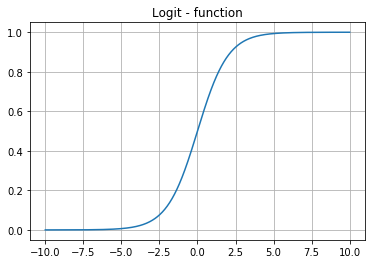

In [4]:
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(-10, 10, 1000)

def logistic_function(x):
    return 1 / (1 + np.exp(-x))

plt.title('Logit - function')
plt.plot(x, logistic_function(x))
plt.grid()
plt.show()


Как вы видите, в целом, вы можете запихнуть в такую функцию что угодно, и получите некоторую оценку вероятности. Все что вам нужно, это чтобы ваш алгоритм был дифференцируемый.

### Multi-class classification

Еще один момент, который нужно уточнить, это что делать в случае, когда классов много. В этом случае мы можем использовать обобщение логистической функции потерь, на несколько классов. Такой лосс называется "кросс-энтропия" и имееть следующий вид

$$
L(y, z) = -\sum_i \log(z_{y_i})
$$

Здесь $z_{y_i}$ - это вероятность, которую предсказал ваш алгоритм для истинного класса $y_i$. Теперь мы можем сделать что-то ручками.

В рамках семинара мы будем работать с датасетом ирисы Фишера.

In [5]:
from sklearn.datasets import load_iris

In [6]:
data = load_iris()

In [7]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [44]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
import pandas as pd

In [12]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

**Задание.** 
Нарисуйте первый и третий признак на диаграмме и подсветите различные классы. Что можно сказат? Вы бы смогли построить правила по которым можно отличить один класс от другого?

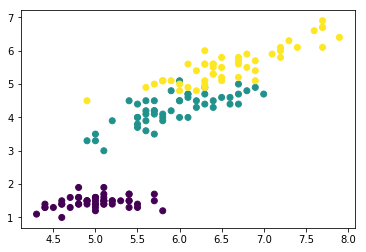

In [15]:
plt.scatter(X['sepal length (cm)'], X['petal length (cm)'], c=y)

Попробуем обучить модель, которая бы смогла отличать два класса. Давайте мы поместим линейную регрессию внутрь сигмоиды? Получится алгоритм следующего вида

$$
a(x, w) = \frac{1}{1 + e^{-x^T w - b}}
$$

Такая модель называется *логит-регрессия*. Возьмем ее из пакета sklearn и обучим отделять друг от друга два класса.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

**Задание.** Создайте новый датасет в котором оставьте только объекты 0 и 1 класса, в качестве признака возьмите ширину лепестка (4-й столбец). Разбейте выборку на `train` и `test` с помощью функции `train_test_split` в соотношении 4 к 1.

In [20]:
mask = y != 2

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X[mask], y[mask], test_size=0.2)

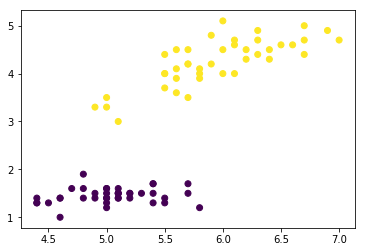

In [41]:
plt.scatter(X_train['sepal length (cm)'], X_train['petal length (cm)'],
           c=y_train)

**Задание.** Обучите логит-регрессию. *Вспоминайте стандартный интерфейс `sklearn`!*

In [24]:
lr = LogisticRegression()

In [25]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
lr.predict(X_test)

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [38]:
y_test

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [40]:
sum(y_test == lr.predict(X_test)) / len(y_test)

1.0

** Задание. ** Сформируйте датасет с двумя признаками (ширина и длина лепестка), где вашим `target` будет 1, если цветок сорта Virginica  и 0, если нет. Обучите логит регрессию на таком датасете без регуляризации (каким для этого нужно сделать параметр $C$?).

In [48]:
(y > 1).astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X[['petal length (cm)','petal width (cm)']], (y > 1).astype(int), test_size=0.2)

In [50]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
lr.predict(X_test)

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0])

In [52]:
y_test

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0])

In [53]:
sum(y_test == lr.predict(X_test)) / len(y_test)

0.9666666666666667

** Задание. ** Визуализируйте разделяющую прямую с функцией `visualize_two_dimensional_logit`.

In [ ]:
np.arange(1,7)

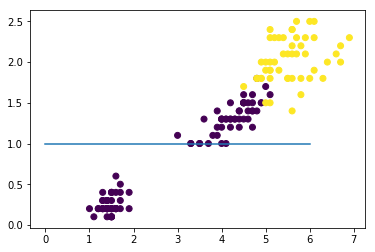

In [64]:
plt.scatter(X['petal length (cm)'], X['petal width (cm)'],
           c=(y > 1).astype(int))
plt.plot(np.arange(0,7), np.ones(7))

Еще немного терминологии. После того как мы сделали предсказание, мы можем посчитать следующие величины:

* TP (True Positive): количество правильно предсказанных объектов класса 1.
* TN (True Negative): количество правильно предсказанных объектов класса 0.
* FP (False Positive): количество объектов класса 0, которые мы классифицировали неправильно.
* FN (False Negative): количество объектов класса 1, которые мы классифицировали неправильно.

Заметим, что логит-регрессия возвращает вероятности, а значит нам нужно выбрать границу, выше которой мы будем считать, что объекты принадлежат классу 1, а ниже классу 0 (на графиках выше это граница равно 0.5).

По разному выбирая такую границу, мы можем получить целый набор точек TP и FP. Посчитав долю (а не количество) и расположив их на прямой, можно получить кривую называемую ROC кривой.

Чтобы оценить качество модель, как и в задачах регрессии, в задачах классификации используются метрики качества.

 * Accuracy: доля правильных ответов.
 * ROC-AUC (Area Under Curve): площадь под ROC кривой.
 

In [65]:
from sklearn.metrics import roc_auc_score, roc_curve

** Задание. ** Оцените accuracy вашего классификатора на train и test. Постройте roc кривую. Посчитайте ROC-AUC.

In [67]:
sum(lr.predict(X_train) == y_train) / len(y_train)

0.9583333333333334

In [68]:
sum(lr.predict(X_test) == y_test) / len(y_test)

0.9666666666666667

In [79]:
(lr.predict_proba(X_test)[:, 1] < 0.37657212).astype(int)

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1])

In [78]:
lr.predict_proba(X_test)[:, 1]

array([0.87091383, 0.04126097, 0.61172883, 0.04134222, 0.03265818,
       0.37320621, 0.05200808, 0.0256465 , 0.03252878, 0.31971413,
       0.71244023, 0.37657212, 0.43250751, 0.76472229, 0.03252878,
       0.61221607, 0.60733374, 0.31971413, 0.03246427, 0.55174568,
       0.71369966, 0.03246427, 0.03272306, 0.04134222, 0.60880074,
       0.03246427, 0.03265818, 0.03259342, 0.05180613, 0.27017457])

In [77]:
y_test

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0])

In [73]:
lr.predict(X_test)

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0])

In [69]:
roc_curve

<function sklearn.metrics.ranking.roc_curve(y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)>

** Задание. Бонус. ** Теперь построим модель, которая бы могла отделять все три класса. Одним из подходов является построение модели для каждого класса, которая могла бы отделять этот класс от всех остальных. После этого мы смотрим на предсказанные вероятности и в качестве нашего предсказания выбираем тот класс, где вероятности наибольшая. Реализуйте такую процедуру. Визуализируйте разбиение.